<a href="https://colab.research.google.com/github/Khoirulmizan/Tugas-Viz-Petemuan-2/blob/main/122450010_Tugas_Viz_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Khoirul Mizan Abdullah
###### 122450010
###### VDI RA

# **Tujuan, user, fungsi, dan tone** dari visualisasi yang akan dibuat:

### Tujuan:
- **Menampilkan Perubahan Populasi**: Visualisasi ini dibuat untuk memperlihatkan persentase perubahan populasi di negara bagian Amerika Serikat antara tahun 2022 dan 2023 secara geografis menggunakan peta choropleth.
- **Membandingkan Data Populasi Antar Wilayah**: Memungkinkan pengguna untuk melihat perbedaan perubahan populasi antar negara bagian secara visual dan mudah dipahami.
- **Memberikan Pemahaman Spasial**: Meningkatkan pemahaman mengenai pola perubahan populasi dengan konteks geografis.

### User:
- **Pengambil Keputusan**: Pemerintah atau organisasi yang bertanggung jawab atas kebijakan demografi atau tata kota bisa menggunakan visualisasi ini untuk menentukan alokasi sumber daya.
- **Peneliti Demografi**: Akademisi atau peneliti yang tertarik dalam mempelajari tren perubahan populasi di wilayah yang berbeda.
- **Publik Umum yang Tertarik pada Data Populasi**: Masyarakat yang ingin melihat tren populasi dan perubahan yang terjadi di berbagai wilayah di Amerika Serikat.

### Fungsi:
- **Menyajikan Data Populasi secara Visual**: Visualisasi ini berfungsi untuk mengubah data numerik yang rumit menjadi lebih mudah dipahami melalui peta.
- **Mengidentifikasi Tren dan Anomali**: Membantu mengidentifikasi negara bagian dengan perubahan populasi yang signifikan, baik peningkatan maupun penurunan.
- **Menyederhanakan Informasi Kompleks**: Menghapus sumbu X dan Y serta spines (batasan) pada grafik memberikan tampilan yang lebih bersih dan fokus hanya pada perubahan populasi.
  
### Tone:
- **Objektif dan Informasional**: Visualisasi ini dirancang secara netral dan berfokus pada penyajian informasi tanpa menambahkan interpretasi atau opini tertentu.
- **Sederhana dan Profesional**: Penyajian visual yang bersih tanpa elemen yang mengganggu, dengan skema warna yang jelas (RdBu) atau Merah - Biru, menciptakan nuansa yang profesional dan informatif.
- **Fokus pada Data**: Penyajian yang meminimalisir elemen dekoratif memastikan perhatian pengguna tertuju pada data perubahan populasi.



# Visualisasi

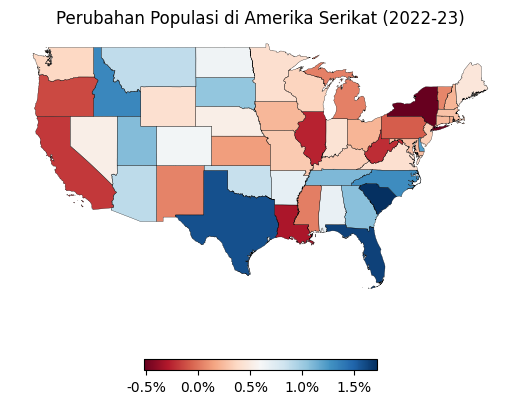

In [96]:
# Mengimpor library atau pustaka yang akan digunakan
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Mengimpor dataset populasi dan shapefile untuk visualisasi
pop_file = 'NST-EST2023-ALLDATA.csv'
shapefile_path = '/content/cb_2022_us_state_500k.shp'

# Mendefinisikan kolom yang akan digunakan untuk data populasi
pop_data = pd.read_csv(pop_file)
pop_data.columns = ['STATENAME', 'POPESTIMATE2022', 'POPESTIMATE2023']

# Membuat kolom baru 'Perubahan Populasi'
pop_data['Perubahan Populasi'] = (pop_data['POPESTIMATE2023'] - pop_data['POPESTIMATE2022']) / pop_data['POPESTIMATE2022'] * 100

# Mengimpor shapefile
shape = gpd.read_file(shapefile_path)

# Melakukan merge data populasi dan shapefile dengan menyocokkan NAME dengan STATENAME
shape = pd.merge(
    left = shape,
    right = pop_data,
    left_on = 'NAME',
    right_on = 'STATENAME',
    how = 'left'
)

# Menghapus missing value dan mengecualikan negara bagian kepulauan agar visualisasi lebih rapih
shape = shape.dropna()
shape = shape[~shape['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

# Membuat format visualisasi
ax = shape.boundary.plot(edgecolor = 'black', linewidth = 0.2, figsize = (10, 5))
shape.plot(ax = ax, column = 'Perubahan Populasi', legend=True, cmap = 'RdBu',
           legend_kwds = {'shrink': 0.3,
                          'orientation': 'horizontal',
                          'format': '%.1f%%'})

# Menyembunyikan informasi x axis dan y axis pada visualisasi sehingga terlihat lebih bersih
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ['top', 'right', 'bottom', 'left']:
    ax.spines[edge].set_visible(False)

# Membuat judul visualisasi peta choropleth
plt.title('Perubahan Populasi di Amerika Serikat (2022-23)')

# Menampilkan visualisasi peta choropleth
plt.show()